# Movies 3

## Introduction

Une base de données (hébergée dans le cloud AWS) contenant un certain nombre de données cinématographiques vous est fournie pour exploration et mise en pratique des langages SQL et Python.  
Les données de connexion (user, host) sont indiquées dans le brief, le mot de passe nécessaire est précisé en session par le formateur.  


## 1. Description Générale

En utilisant DBeaver et les paramètres de connexion donnés par ailleurs, faire une description détaillée de la base de données fournie. Présenter notamment le diagramme entité - relation (ERD) et les différentes caractéristiques des tables de la base.  Quels types de renseignement peut-on tirer de cette base de données ?   

La base de données contient quatre tables :
- movies: champs: 
                  - id (int)
                  - title (varchar(80))
                  - year (int)
                  - directorId (int)
                  - genre (varchar(20))
                  - summary (text)
                  - countrycode  (varchar(4))

- countries: champs: 
                  - code (varchar(4))
                  - name (varchar(30))
                  - language (varchar(30))


- roles: champs: 
                  - movieId (int)
                  - actorId (int)
                  - character (varchar(255))

- artists: champs: 
                  - id (int)
                  - lastname (varchar(30))
                  - firstname (varchar(30))
                  - birthyear (int)

La table movies présente le titre, l'année, le genre et le résumé des films listés, ainsi que l'identifiant de leur réalisateur et le code pays.
Celle countries explicite pour chaque code pays le nom dee celui-ci et sa langue.
Celle roles donne pour chaque film (movieId) ses acteurs (actorId) et le personnage que chacun joue.
Celle artists présente le prénom, nom de famille et année de naissance des acteurs.

Grâce à elle, on peut plus facilement exploiter les informations sur les acteurs que dans les bases de données précédentes. Par exemple, on peut obtenir la liste des films dans lesquels un acteur donné a joué.

![diagram](https://cdn.discordapp.com/attachments/778291355473412107/796670836173832212/cc.PNG)

---

## 2. Exploration SQL via python / pandas
Dans cette partie, on s'attache à explorer la base de données en utilisant le language SQL pour les requêtes et le language Python (+ module pandas) pour récupérer les résultats de façon programmatique.  
Vous pouvez utiliser DBeaver ou outil similaire pour préparer / tester vos requêtes mais celles-ci doivent être reportées et appliquées dans du code Python comme présenté dans les quelques examples à suivre.  
*Pour les résultats "longs", un aperçu des quelques premières lignes et le comptage total des résultats est suffisant.*

In [1]:
import os
import pandas as pd

In [2]:
from sqlalchemy import create_engine
import pymysql

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# paramètres de connexion à la base de données movies (MySQL sous AWS RDS)
user = os.environ.get('movies3_user')
password = os.environ.get('movies3_psw') 
host = os.environ.get('movies3_host')  
port = 3306
dbname = 'movies'  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{dbname}")

In [5]:
print(user)

student


### Exemples

#### Tables de base

In [6]:
movies = pd.read_sql_query("SELECT * FROM movies LIMIT 10", engine)
movies.head()

,id,title,year,directorId,genre,summary,countrycode
0,11,La Guerre des étoiles,1977,1,Aventure,"Il y a bien longtemps, dans une galaxie très l...",US
1,24,Kill Bill : Volume 1,2003,138,Action,Au cours d'une cérémonie de mariage en plein d...,US
2,28,Apocalypse Now,1979,1776,Drame,L'état-major américain confie au jeune capitai...,US
3,33,Impitoyable,1992,190,Western,"Après avoir été un impitoyable tueur, toujours...",US
4,38,Eternal Sunshine of the Spotless Mind,2004,201,Science-Fiction,Joël et Clémentine ne voient plus que les mauv...,US


In [7]:
artists = pd.read_sql_query("SELECT * FROM artists LIMIT 10", engine)
artists.head()

,id,lastname,firstname,birthyear
0,1,Lucas,George,1944
1,2,Hamill,Mark,1951
2,3,Ford,Harrison,1942
3,4,Fisher,Carrie,1956
4,5,Cushing,Peter,1913


In [8]:
roles = pd.read_sql_query("SELECT * FROM roles LIMIT 10", engine)
roles.head()

,movieId,actorId,character
0,11,2,Luke Skywalker
1,1891,2,Luke Skywalker
2,1892,2,Luke Skywalker
3,181808,2,Luke Skywalker / Dobbu Scay (voice)
4,11,3,Han Solo


In [9]:
countries = pd.read_sql_query("SELECT * FROM countries LIMIT 10", engine)
countries.head()

,code,name,language
0,AU,Australia,
1,BE,Belgium,
2,BS,Bahamas,
3,CA,Canada,
4,CN,China,


#### Autre requête simple
Q00: Nom et année de naissance des artistes nés après 1975 ? Combien sont-ils ?

In [10]:
sql_query_00 = """
    SELECT *
    FROM artists
    WHERE birthyear > 1975
"""

results = pd.read_sql_query(sql_query_00, engine)
results.head(5)

,id,lastname,firstname,birthyear
0,131,Gyllenhaal,Jake,1980
1,205,Dunst,Kirsten,1982
2,225,Holmes,Ashton,1978
3,258,García Bernal,Gael,1978
4,368,Witherspoon,Reese,1976


In [11]:
results.shape

(118, 4)

In [12]:
len(results)

118

### Questions

Q01: Quels sont les films de type 'Drame' ? Combien cela représente de films ?  

In [13]:
sql_query_01 = """
    SELECT genre AS "Genre", title AS "Titre"
    FROM movies
    WHERE genre = "Drame"
    
"""

results = pd.read_sql_query(sql_query_01, engine)
results.head(5)

,Genre,Titre
0,Drame,Apocalypse Now
1,Drame,A History of Violence
2,Drame,Match point
3,Drame,Le Secret de Brokeback Mountain
4,Drame,Breaking the Waves


In [14]:
len(results)

83

Q02: Quels rôles a joué Bruce Willis et dans quels films (triés par ordre chronologique) ?

In [15]:
sql_query_02 = """
    SELECT title AS "Titre", year AS "Année", roles.character AS "Rôle", lastname AS "Nom", firstname AS "Prénom"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE lastname = "Willis" AND firstname = "Bruce"
    ORDER BY year;
"""

results = pd.read_sql_query(sql_query_02, engine)
results.head()

,Titre,Année,Rôle,Nom,Prénom
0,Piège de cristal,1988,John McClane,Willis,Bruce
1,58 minutes pour vivre,1990,John McClane,Willis,Bruce
2,Pulp Fiction,1994,Butch Coolidge,Willis,Bruce
3,Une Journée en enfer,1995,John McClane,Willis,Bruce
4,Die Hard 4 : Retour en enfer,2007,John McClane,Willis,Bruce


Q03: Qui est le réalisateur de Memento ?

In [16]:
sql_query_03 = """
    SELECT title AS "Titre", lastname AS"Nom", firstname AS "Prénom"
    FROM movies
    INNER JOIN artists ON movies.directorId = artists.id
    WHERE title = "Memento";
"""

results = pd.read_sql_query(sql_query_03, engine)
results.head()

,Titre,Nom,Prénom
0,Memento,Nolan,Christopher


Q04: Qui a joué le rôle de Chewbacca et dans quels films ?

In [17]:
sql_query_04 = """
    SELECT title AS "Titre", roles.character AS "Rôle", lastname AS "Nom", firstname AS "Prénom"
    FROM roles
    INNER JOIN artists ON roles.actorId = artists.id
    INNER JOIN movies ON roles.movieId = movies.id
    WHERE roles.character = "Chewbacca";
"""

results = pd.read_sql_query(sql_query_04, engine)
results.head()

,Titre,Rôle,Nom,Prénom
0,La Guerre des étoiles,Chewbacca,Mayhew,Peter
1,L'Empire contre-attaque,Chewbacca,Mayhew,Peter
2,Le Retour du Jedi,Chewbacca,Mayhew,Peter
3,Star Wars : Le Réveil de la Force,Chewbacca,Mayhew,Peter
4,Star Wars : Les Derniers Jedi,Chewbacca,Suotamo,Joonas


Q05: Dans quels films Bruce Willis a-t-il joué le role de John McClane ? 

In [18]:
sql_query_05 = """
    SELECT title AS "Titre", lastname AS "Nom", firstname AS "Prénom", roles.character AS "Rôle"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE lastname = "Willis" AND firstname = "Bruce" AND     
    roles.character = "John McClane"
"""

results = pd.read_sql_query(sql_query_05, engine)
results.head()

,Titre,Nom,Prénom,Rôle
0,Piège de cristal,Willis,Bruce,John McClane
1,Die Hard 4 : Retour en enfer,Willis,Bruce,John McClane
2,Une Journée en enfer,Willis,Bruce,John McClane
3,58 minutes pour vivre,Willis,Bruce,John McClane


Q06: Quels sont les acteurs de 'Sueurs froides' ?

In [19]:
sql_query_06 = """
    SELECT title AS "Titre", lastname AS "Nom", firstname AS "Prénom"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE title = "Sueurs froides";
"""

results = pd.read_sql_query(sql_query_06, engine)
results.head()

,Titre,Nom,Prénom
0,Sueurs froides,Stewart,James
1,Sueurs froides,Novak,Kim
2,Sueurs froides,Bel Geddes,Barbara


Q07: Quels sont les films dont le réalisateur est Tim Burton, et l’un des acteurs Johnny Depp ?

In [20]:
sql_query_07 = """
    SELECT title
        FROM movies
        INNER JOIN artists ON movies.directorId = artists.id
        WHERE lastname = "Burton"
    UNION
    SELECT title
        FROM movies
        INNER JOIN roles ON movies.id = roles.movieId
        INNER JOIN artists ON roles.actorId = artists.id
        WHERE lastname = "Depp"
"""

results = pd.read_sql_query(sql_query_07, engine)
results.head()

,title
0,"Sleepy Hollow, La Légende du cavalier sans tête"


Q08: Quels sont les films dans lesquels a joué Woody Allen ? Donnez aussi le rôle.

In [21]:
sql_query_08 = """
    SELECT title AS "Titre", lastname AS "Nom", firstname AS "Prénom", roles.character AS "Rôle"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE lastname = "Allen" AND firstname = "Woody"
"""

results = pd.read_sql_query(sql_query_08, engine)
results.head()

,Titre,Nom,Prénom,Rôle
0,Scoop,Allen,Woody,Sid Waterman
1,Manhattan,Allen,Woody,Isaac Davis
2,Annie Hall,Allen,Woody,Alvy Singer
3,Maris et femmes,Allen,Woody,Prof. Gabriel 'Gabe' Roth


Q09: Quel metteur en scène a tourné dans ses propres films ? Donnez le nom, le rôle et le titre des films en question.

In [22]:
sql_query_09 = """
    SELECT lastname AS "Nom", firstname AS "Prénom", title AS "Titre", roles.character AS "Rôle"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE movies.directorId = roles.actorId;
"""

results = pd.read_sql_query(sql_query_09, engine)
results.head()

,Nom,Prénom,Titre,Rôle
0,Eastwood,Clint,Impitoyable,Bill Munny
1,Tarantino,Quentin,Reservoir Dogs,Mr. Brown
2,Allen,Woody,Scoop,Sid Waterman
3,Tarantino,Quentin,Pulp Fiction,Jimmie Dimmick
4,Allen,Woody,Manhattan,Isaac Davis


Q10: Quels sont les films de Quentin Tarantino dans lesquels il n’a pas joué 

In [23]:
sql_query_10 = """
    SELECT a.title 
    FROM movies AS a
    INNER JOIN artists ON a.directorId = artists.id
    WHERE lastname = "Tarantino"
    AND title NOT IN (
      SELECT b.title 
      FROM movies AS b
      INNER JOIN roles ON b.id = roles.movieId
      INNER JOIN artists ON roles.actorId = artists.id
      WHERE lastname = "Tarantino")
"""

results = pd.read_sql_query(sql_query_10, engine)
results.head()

,title
0,Kill Bill : Volume 1
1,Jackie Brown
2,Kill Bill : Volume 2
3,Inglourious Basterds
4,Django Unchained


Le résultat est faux puisqu'il a bel et bien joué dans certains de ces films, mais on peut vérifier que la requête est bonne et que l'erreur vient de la base de données, qui ne cite que les acteurs principaux :

In [24]:
sql_query_10bis = """
      SELECT title 
      FROM movies
      INNER JOIN roles ON movies.id = roles.movieId
      INNER JOIN artists ON roles.actorId = artists.id
      WHERE lastname = "Tarantino"
"""

results = pd.read_sql_query(sql_query_10bis, engine)
results.head()

,title
0,Reservoir Dogs
1,Pulp Fiction


Q11: Quel metteur en scène a tourné en tant qu’acteur ? Donner le nom, le rôle et le titre des films dans lesquels cet artiste a joué.

In [25]:
sql_query_11 = """
    SELECT lastname as "Nom", title as "Titre du film", roles.actorId as "ID Acteur", roles.character AS "Rôle", movies.directorId as "ID Metteur en scène" 
    FROM movies
    INNER JOIN artists ON movies.directorId = artists.id
    INNER JOIN roles ON movies.id = roles.movieId
    WHERE movies.directorId = roles.actorId;
"""

results = pd.read_sql_query(sql_query_11, engine)
results.head()

,Nom,Titre du film,ID Acteur,Rôle,ID Metteur en scène
0,Eastwood,Impitoyable,190,Bill Munny,190
1,Tarantino,Reservoir Dogs,138,Mr. Brown,138
2,Allen,Scoop,1243,Sid Waterman,1243
3,Tarantino,Pulp Fiction,138,Jimmie Dimmick,138
4,Allen,Manhattan,1243,Isaac Davis,1243


Q12: Quels sont les films de Hitchcock sans James Stewart

In [26]:
sql_query_12 = """
    SELECT a.title 
    FROM movies AS a
    INNER JOIN artists ON a.directorId = artists.id
    WHERE lastname = "Hitchcock"
    AND title NOT IN (
      SELECT b.title 
      FROM movies AS b
      INNER JOIN roles ON b.id = roles.movieId
      INNER JOIN artists ON roles.actorId = artists.id
      WHERE lastname = "Stewart")
"""

results = pd.read_sql_query(sql_query_12, engine)
results.head()

,title
0,La Mort aux trousses
1,Rebecca
2,Les Enchaînés
3,Psychose
4,Les Oiseaux


Q13: Quelle est la filmographie de James Stewart ?

In [27]:
sql_query_13 = """
    SELECT lastname as "Nom", firstname as "Prénom", title AS "Titre"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE lastname = "Stewart" AND firstname = "James";
"""

results = pd.read_sql_query(sql_query_13, engine)
results.head()

,Nom,Prénom,Titre
0,Stewart,James,Sueurs froides
1,Stewart,James,Fenêtre sur cour
2,Stewart,James,L'homme qui en savait trop


Q14: Quels sont les films sans rôle (acteurs) ?

In [28]:
sql_query_14 = """
    SELECT title AS "Titre"
    FROM (
    SELECT title, COUNT(roles.movieId) AS compteur
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    GROUP BY roles.movieId) AS compteur
    WHERE compteur.compteur = 0;
"""

results = pd.read_sql_query(sql_query_14, engine)
results.head()

,Titre


On n'a aucun résultat mais ce n'est pas une erreur. La base de données n'a tout simplement pas de film sans aucun acteur. Pour le prouver, on peut modifier la commande en demandant un autre nombre d'acteurs. Dans les requêtes libres détaillées plus loin, on a cherché le nombre d'acteurs listés par film. On sait que Pulp Fiction en a le plus : 12. Donc si avec notre compteur on cherche les films ayant exactement 12 acteurs listés, on devrait trouver un seul résultat, Pulp Fiction. C'est bien le cas donc la requête est bonne.

In [29]:
sql_query_14bis = """
    SELECT title
    FROM (
    SELECT title, COUNT(roles.movieId) AS compteur
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    GROUP BY roles.movieId) AS compteur
    WHERE compteur.compteur = 12;
"""

results = pd.read_sql_query(sql_query_14bis, engine)
results.head()

,title
0,Pulp Fiction


Q15: Combien d'acteurs n’ont jamais réalisé de film ? 

In [30]:
sql_query_15 = """
    SELECT DISTINCT artists.id AS "id", lastname as "Nom", firstname AS "Prénom"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE artists.id NOT IN (
      SELECT DISTINCT artists.id
      FROM movies
      INNER JOIN artists ON movies.directorId = artists.id)
    ORDER BY artists.id;
"""

results = pd.read_sql_query(sql_query_15, engine)
results.head()

,id,Nom,Prénom
0,2,Hamill,Mark
1,3,Ford,Harrison
2,4,Fisher,Carrie
3,5,Cushing,Peter
4,6,Daniels,Anthony


In [31]:
len(results)

986

Q16: Donnez les noms et prénoms des 10 réalisateurs les plus prolifiques, ainsi que le nombre de films qu’ils ont tournés ?

In [32]:
sql_query_16 = """
    SELECT lastname AS "Nom", firstname AS "Prénom", COUNT(directorId) AS "Nombre de films"
    FROM movies
    INNER JOIN artists ON movies.directorId = artists.id
    GROUP BY directorId
    ORDER BY COUNT(directorId) DESC
    LIMIT 10;
"""

results = pd.read_sql_query(sql_query_16, engine)
results.head()

,Nom,Prénom,Nombre de films
0,Spielberg,Steven,13
1,Hitchcock,Alfred,10
2,Allen,Woody,8
3,Tarantino,Quentin,7
4,Kubrick,Stanley,7


Q17: Donnez les noms et prénoms des réalisateurs qui ont tourné au moins deux films. Combien sont-ils ?

In [33]:
sql_query_17 = """
    SELECT lastname AS "Nom", firstname AS "Prénom", COUNT(directorId) AS "Nombre de films"
    FROM movies
    INNER JOIN artists ON movies.directorId = artists.id
    GROUP BY directorId
    ORDER BY COUNT(directorId) DESC;
"""

results = pd.read_sql_query(sql_query_17, engine)
results.head()

,Nom,Prénom,Nombre de films
0,Spielberg,Steven,13
1,Hitchcock,Alfred,10
2,Allen,Woody,8
3,Tarantino,Quentin,7
4,Kubrick,Stanley,7


In [34]:
len(results)

107

Q18: Dans quels films le réalisateur a-t-il le même prénom que l’un des interprètes ? (titre, nom du réalisateur, nom de l’interprète). Le réalisateur et l’interprète ne doivent pas être la même personne.

In [35]:
sql_query_18 = """
    SELECT DISTINCT movies.title AS "Titre", imbric.firstname AS "Prénom", artists.lastname AS "Nom du réalisateur", imbric.lastname AS "Nom de l'acteur"
    FROM movies
    INNER JOIN artists ON movies.directorId = artists.id
    INNER JOIN (
        SELECT title, firstname, lastname, artists.id AS "id"
        FROM movies
        INNER JOIN roles ON movies.id = roles.movieId
        INNER JOIN artists ON roles.actorId = artists.id)
    AS imbric
    WHERE artists.firstname = imbric.firstname
    AND artists.id != imbric.id
    ORDER BY imbric.firstname;
"""

results = pd.read_sql_query(sql_query_18, engine)
results.head(20)

,Titre,Prénom,Nom du réalisateur,Nom de l'acteur
0,Vice,Adam,McKay,Driver
1,Vice,Adam,McKay,Goldberg
2,On connaît la chanson,Alain,Resnais,Delon
3,Les Hommes du président,Alan,J. Pakula,Arkin
4,Les Hommes du président,Alan,J. Pakula,King
5,Les Hommes du président,Alan,J. Pakula,Mowbray
6,Les Hommes du président,Alan,J. Pakula,Rickman
7,Soupçons,Alfred,Hitchcock,Molina
8,L'Inconnu du Nord-Express,Alfred,Hitchcock,Molina
9,L'homme qui en savait trop,Alfred,Hitchcock,Molina


Q19: Quels sont les 10 pays produisant le plus de films ?

In [36]:
sql_query_19 = """
    SELECT name AS "Pays", COUNT(countrycode) AS "Nombre de films"
    FROM movies
    INNER JOIN countries ON movies.countrycode = countries.code
    GROUP BY countrycode
    ORDER BY COUNT(countrycode) DESC
    LIMIT 5;
"""

results = pd.read_sql_query(sql_query_19, engine)
results.head()

,Pays,Nombre de films
0,Etats-Unis,131
1,France,39
2,Royaume-Uni,21
3,Canada,6
4,Italie,5


Q20: Quels sont les 5 acteurs ayant le plus joué dans des films français ?

In [37]:
sql_query_20 = """
    SELECT lastname AS "Nom", firstname AS "Prénom", COUNT(actorId) AS "Nombre de films"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id
    WHERE countrycode = "FR"
    GROUP BY actorId
    ORDER BY COUNT(actorId) DESC
    LIMIT 5;
"""

results = pd.read_sql_query(sql_query_20, engine)
results.head()

,Nom,Prénom,Nombre de films
0,Deneuve,Catherine,3
1,Belmondo,Jean-Paul,3
2,Piccoli,Michel,3
3,Fresnay,Pierre,2
4,Arestrup,Niels,2


---

## 3. Expression libre

A vous de jouer ! Tentez quelques requêtes de votre choix (avec pourquoi pas quelques graphiques illustratifs en utilisant Matplotlib...)

A) Nombre d'acteurs listés par film

In [38]:
sql_query_alpha = """
    SELECT title AS "Titre", COUNT(roles.movieId) AS "Nombre d'acteurs listés"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    GROUP BY roles.movieId
    ORDER BY COUNT(roles.movieId) DESC
    LIMIT 10;
"""

results = pd.read_sql_query(sql_query_alpha, engine)
results.head(10)

,Titre,Nombre d'acteurs listés
0,Pulp Fiction,12
1,Kill Bill : Volume 1,11
2,Reservoir Dogs,10
3,"Le Parrain, 3ème partie",10
4,"Le Parrain, 2ème partie",10
5,Kill Bill : Volume 2,10
6,Inglourious Basterds,9
7,Les tontons flingueurs,9
8,On connaît la chanson,9
9,Usual Suspects,9


B) Nombre de films par année

In [39]:
sql_query_beta = """
    SELECT year AS "Année", COUNT(title) AS "Nombre de films"
    FROM movies
    GROUP BY year
    ORDER BY year DESC;
    """

results = pd.read_sql_query(sql_query_beta, engine)
results.head(10)

,Année,Nombre de films
0,2019,2
1,2018,7
2,2017,6
3,2016,4
4,2015,4
5,2014,1
6,2013,3
7,2012,4
8,2011,5
9,2010,5


In [40]:
data = results

In [41]:
x = data["Année"]
y = data["Nombre de films"]

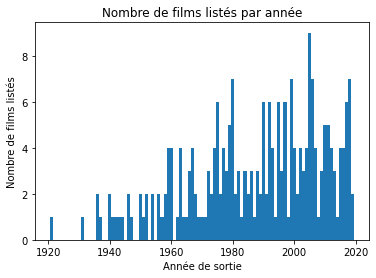

In [42]:
plt.figure()
plt.bar(x, y, width=1)
plt.title("Nombre de films listés par année")
plt.xlabel("Année de sortie")
plt.ylabel("Nombre de films listés")
plt.show()

C) Dans quels films apparaît le personnage "Indiana Jones" et en quelle année

In [43]:
sql_query_gamma = """
    SELECT title AS "Titre", roles.character AS "Personnage", year AS "Année"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    WHERE roles.character = "Indiana Jones";
"""

results = pd.read_sql_query(sql_query_gamma, engine)
results.head()

,Titre,Personnage,Année
0,Les Aventuriers de l'arche perdue,Indiana Jones,1981
1,Indiana Jones et le temple maudit,Indiana Jones,1984
2,Indiana Jones et la dernière croisade,Indiana Jones,1989


D) Montrer les années de naissance des acteurs par année de film

In [44]:
sql_query_delta = """
    SELECT year AS "Année du film", birthyear AS "Année de naissance des acteurs"
    FROM movies
    INNER JOIN roles ON movies.id = roles.movieId
    INNER JOIN artists ON roles.actorId = artists.id;
"""

results = pd.read_sql_query(sql_query_delta, engine)
results.head()

,Année du film,Année de naissance des acteurs
0,1977,1951.0
1,1980,1951.0
2,1983,1951.0
3,2017,1951.0
4,1977,1942.0


In [45]:
data = results

In [46]:
x = data["Année du film"]
y = data["Année de naissance des acteurs"]

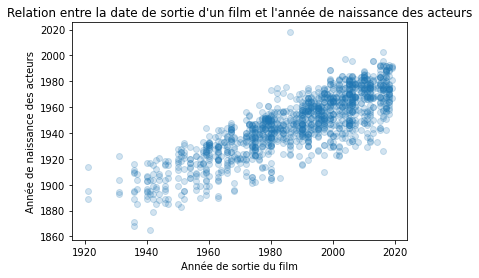

In [47]:
plt.figure()
plt.scatter(x, y, alpha = 0.2)
plt.title("Relation entre la date de sortie d'un film et l'année de naissance des acteurs")
plt.xlabel("Année de sortie du film")
plt.ylabel("Année de naissance des acteurs")
plt.show()